In [67]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import metrics
import numpy as np

In [68]:
m=loadmat("../data/BSR/BSDS500/data/groundTruth/train/2092.mat")
l = m['groundTruth'][0,0]

The groud truth for this image (2092.jpg) contains human-segmented images from 7 subjects. We can pick the 1st subject's segmentation result as our ground truth. 

In [77]:
# val contains the cluster assignment of each pixel.
val = l[0,0][0]
val

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15]], dtype=uint16)

In [70]:
# val2 contains the 
val2 = l[0,0][1]

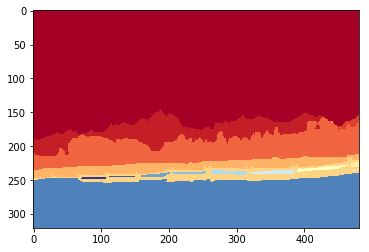

In [71]:
plt.imshow(val, cmap=plt.cm.RdYlBu)

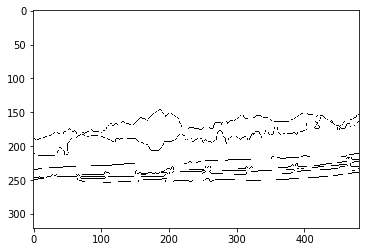

In [72]:
plt.imshow(val2,cmap="Greys")

In [73]:
np.max(val)

17

In [74]:
np.shape(val)

(321, 481)

In [75]:
val = val.reshape(-1)
rans = np.random.randint(17, size=np.shape(val)).reshape(-1)

In [76]:
# reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

print("Homogeneity: %0.3f" % metrics.homogeneity_score(val, rans))
print("Completeness: %0.3f" % metrics.completeness_score(val, rans))
print("V-measure: %0.3f" % metrics.v_measure_score(val, rans))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(val, rans))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(val, rans))

Homogeneity: 0.001
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Index: -0.000
Adjusted Mutual Information: -0.000
